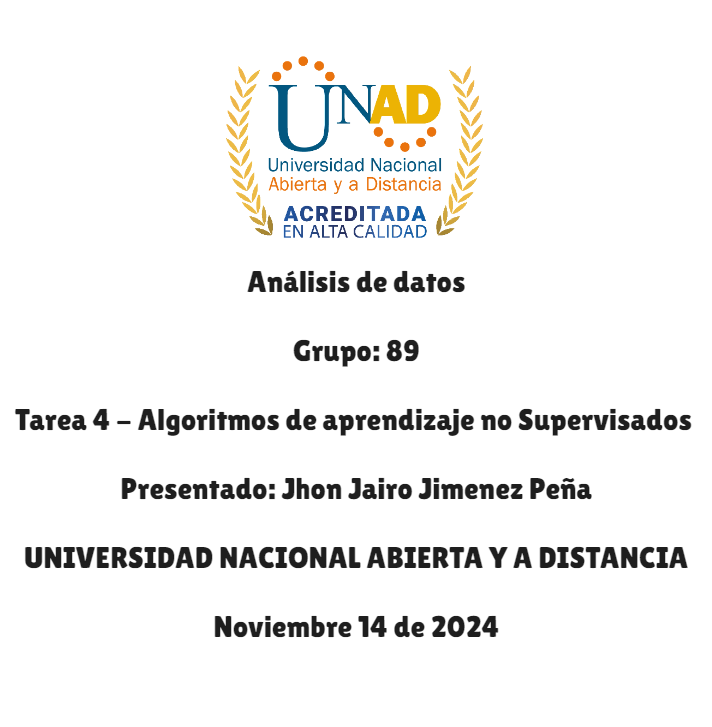

In [4]:
from IPython.display import Image
Image(filename='Pictures/Drawing.excalidraw.png')

In [64]:
#Cargar las librerias necesarias
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import scipy.cluster.hierarchy as sch

# librerías de para implementar modelo hierarchical clustering
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import linkage, dendrogram

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [9]:
# Creacion de variable mallCustomer donde se cargara el dataset "Mall Customer Segmentation"
mallCustomer = pd.read_csv('C:/Users/Jhon/Documents/UNAD/9_semestre/Analisis_de_datos/Tarea_4/Mall_Customers.csv')

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

En este ejercicio realizaremos la aplicacion del metodo de analisis de agrupamiento no supervisado de "hierarchical clustering",<br>
el objetivo de este analisis es segmentar al grupo de clientes de un centro comercial  de acuerdo a su puntaje de gastos con <br>
forme a sus ingresos anuales, con el fin de ofrecer un mejor servicio y mas optimizado por parte del centro comercial.

In [11]:
mallCustomer.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Identificacion de variables para realizacion de analisis exploratorio

Customer ID = Se refiere al numero de DNI que se agigna automaticamente a cada uno de los clientes.<br>
Gender= Se refiere al genero de cada uno de los clientes, siendo hombre y mujer.<br>
Age = Se refiere a la edad de cada uno de los clientes.<br>
Annual Income = Esta variable tiene la informacion de los ingresos anuales de cada cliente equivalente en miles.<br>
Spending Score = Esta variable tiene una calificacion que tiene asignada el mismo centro comerciar para evaluar el comportamiento de cada cliente.

In [13]:
mallCustomer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Identificacion de valores atipicos

Customer ID = Se evidencian un total de 200 registros conforme a 200 clientes, ademas de que se evidencia que es un identificador<br>
que se autoincrementa cada vez que se agreaga un registro nuevo.<br><br>
Age = Se encuentran 200 registros los cuales tienen un valor minimo de 18 años y un valor maximo de 70 años por lo cual no se evidencia<br>
ningun valor atipico.<br><br>
Annual Income = En esta variable de ingreso anual salarial evidenciamos un promedio de 60.000 dolares anuales, existe un valor maximo de 137.000 dolares<br> anuales lo cual podria ser un valor atipico pero es necesario evaluarlo graficamente posteriormente.<br><br>
Spending Score = Esta variable tiene una calificacion asignada a cada cliente y al ser una calificacion de 1 - 100 no se evidencia ningun valor atipico.

In [15]:
print(mallCustomer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


<br>No se identifica ningun valor nulo en cada una de las 5 variables de las cuales se encuentra compuesto el dataset.<br>
Se identifican 4 variables de tipo numerico int64 y la variable Gender la cual es genero que es de tipo object<br>
Se identifica un uso de memoria de 7.9 KB del archivo Mall_Customers.csv

Text(0.5, 1.0, 'Datos atipicos')

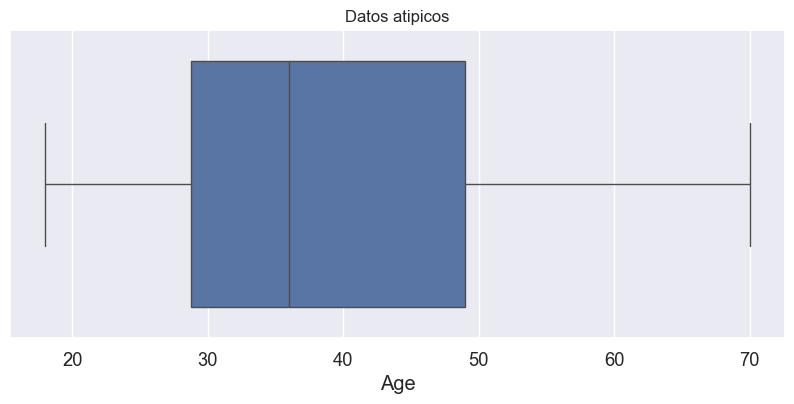

In [17]:
#Identificación de datos atipicos variable edad

plt.figure(figsize=(10, 4))
sns.boxplot(x=mallCustomer['Age'])
plt.title('Datos atipicos', fontsize=12 )

Por medio de la realizacion de una grafica boxplot para analisis de distribucion de la variable numerica de edad se identifica que la caja 
central se encuentra entre los 30 y 50 años siendo este el 50 % de los datos, ademas de la linea central que nos identifica la mediana
en 36 años, y no se identifica ningun dato atipo externo a la caja central.

Text(0.5, 1.0, 'Datos atipicos')

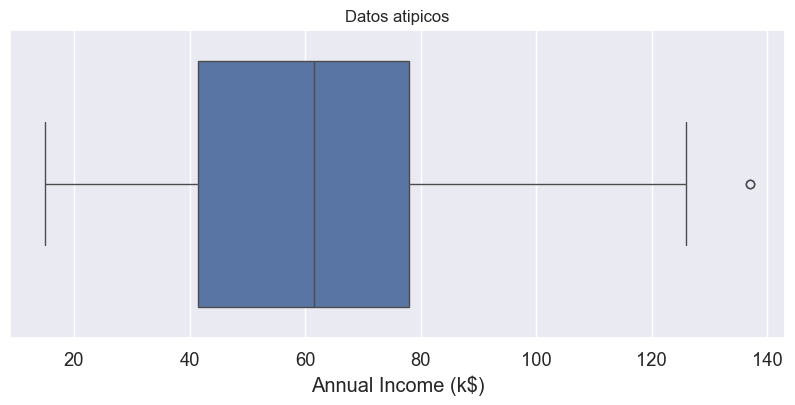

In [19]:
#Identificación de datos atipicos variable ingresos anuales

plt.figure(figsize=(10, 4))
sns.boxplot(x=mallCustomer['Annual Income (k$)'])
plt.title('Datos atipicos', fontsize=12 )

En esta grafica boxplot realizado a la variable numerica ¨Annual Income¨ o ingresos anuales podemos identificar que la
caja central se encuentra entre los valores de 40 k y y 80 k, ademas identificamos la linea vertical que nos refleja la 
mediana en aproximadamente 62 k, podemos evidenciar un valor atipico el cual es el valor de 137 k observado tambien al
momento de obtener la descripcion completa del dataset.

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Se identifican datos atipicos en la variable Annual Income por tal motivo se utilizaran los datos que se encuentran dentro de la 
caja central de la grafica de boxplot los cuales serian entre 20k y 100k.

In [21]:
#Parametros de filtrado para evaluar los datos atipicos

nivel_minimo=20
nivel_maximo=100
Total_Atipicos=((mallCustomer['Annual Income (k$)']<nivel_minimo)|(mallCustomer['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 26


Obtenemos un total de 26 valores atipìcos, registros los cuales seran eliminados para que no interfieran con el procesamiento
del modelo mas adelante.

In [23]:
# Filtrado de datos atipìcos y guardado en la variable resultado

Resultado = mallCustomer[(mallCustomer['Annual Income (k$)']<=nivel_maximo)&(mallCustomer['Annual Income (k$)']>=nivel_minimo)]

In [25]:
# Descripcion de informacion para identificar filtrado de datos atipicos
print(Resultado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 12 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              174 non-null    int64 
 1   Gender                  174 non-null    object
 2   Age                     174 non-null    int64 
 3   Annual Income (k$)      174 non-null    int64 
 4   Spending Score (1-100)  174 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.2+ KB
None


Se evidencian 174 regristros, lo que significa que si fueron eliminados los 26 valores atipicos obtenidos en el filtrado.

In [29]:
Resultado.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
12,13,1,58,20,15
13,14,1,24,20,77
14,15,0,37,20,13
15,16,0,22,20,79
16,17,1,35,21,35
17,18,0,20,21,66
18,19,0,52,23,29
19,20,1,35,23,98
20,21,0,35,24,35
21,22,0,25,24,73


# 3.   Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [31]:
# Filtrado de columnas mas relevantes para el modelo
Resultado = Resultado[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

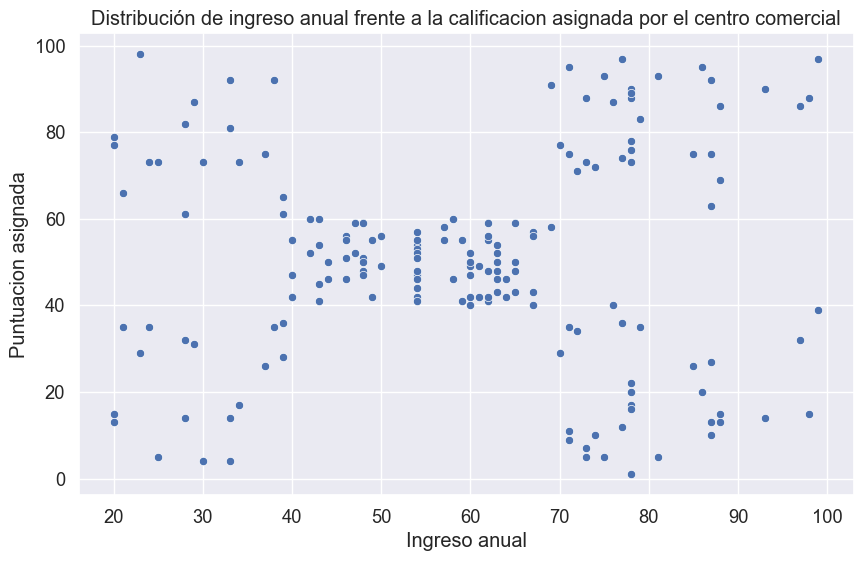

In [33]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Resultado['Annual Income (k$)'], y=Resultado['Spending Score (1-100)'])
plt.title('Distribución de ingreso anual frente a la calificacion asignada por el centro comercial')
plt.xlabel('Ingreso anual')
plt.ylabel('Puntuacion asignada')
plt.show()

Si analizamos los resultados obtenidos con el agrupamiento de datos entre ingreso anual de los clientes y la puntuacion 
asignada por el centro comercial de acuerdo al comportamiento del cliente, podemos evidenciar que los clientes que tienen un
promedio salarial entre 40k y 70k anuales mantienen una puntuacion promedio entre 50 puntos de 100.<br> 
Muy a diferencia de las personas entre 20k - 40k y 70k - 100k, los cuales tienen una calificacion de comportamiento mucho mas dispersa.

# 4. Entrenar el modelo configurando los diferentes hiperparámetros.

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Resultado[["Annual Income (k$)","Age","Spending Score (1-100)"]])

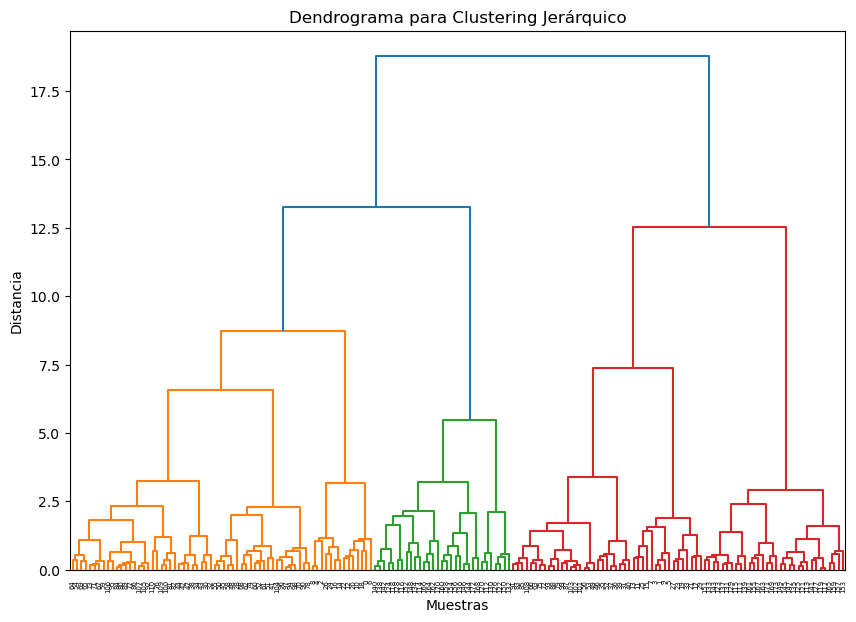

In [161]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

Analisis:<br>
Principalmente podemos evidenciar que tres clusters principales debajo de la distancia 12.5 <br><br>
Annual Income (k$) (Ingreso anual): Podemos evidenciar que cuenta con una dismilitud bastante baja a comparacion de las demas variables, lo que <br>
nos indica que cuenta con elementos mas similares entre si que en otros cluster.<br><br>
Age (Edad): Se encuentra un dismilitud muy baja por tal motivo se evidencia que existe una relacion intermedia entre las otras dos variables del <br>
cluster.<br><br>
Spending Score (1-100) (Puntuacion centro comercial): Se evidencia una alta disimulitud frente a los otros dos cluster, pero en la parte inferior<br>
de la grafica los cluster tambien cuentan con dismilitud muy similar a las demas, significando que es muy posible que exista una relacion entre las<br>
variables puntuacion comercial e ingreso anual.

In [37]:
# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Resultado[['Annual Income (k$)','Age','Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.3515384837713589
Índice de Calinski-Harabasz: 87.60102855695801
Índice de Davies-Bouldin: 1.0686466951916858


# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.


Coeficiente de Silhouette: El coeficiente de silhoutte tiene como funcion evaluar que tan separados se encuentran cada uno<br>
de los cluster, entre mas cercano sea el valor a 1 significa que se encuentran mejor agrupados, en esta caso cuentan con un<br>
valor de '0.35' significando que no se encuentran muy bien agrupados, pero son relativamente aceptables para entrenar el <br>
modelo.<br><br>
Índice de Calinski-Harabasz: El indice de Calinski-harabasz nos permite evaluar la relacion existente entre cada uno de los <br>
cluster que se prensentan, entre mas alto sea el valor nos indica que se encuentra mejor separados los datos y que la relacion <br>
existente entre cluster se encuentra mejor establecida, en este caso el valor es de '87.60' lo que nos indica un valor <br>
mediocre, no es bajo para se catalogado malo, pero tampoco es un valor muy representativo.<br><br>
Índice de Davies-Bouldin: Este indice nos indica que tan parecidos es un cluster de otro, entre mas bajo sea el valor mucho mejor,<br>
en este caso se obtuvo un valor de '1.06', este valor es aceptable obteniendo una similitud cercana, evidenciando que se prodian<br>
diferenciar mas entre cada uno de los cluster.

# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

## Desarrollo de mapa de calor, relacionado a dendrograma

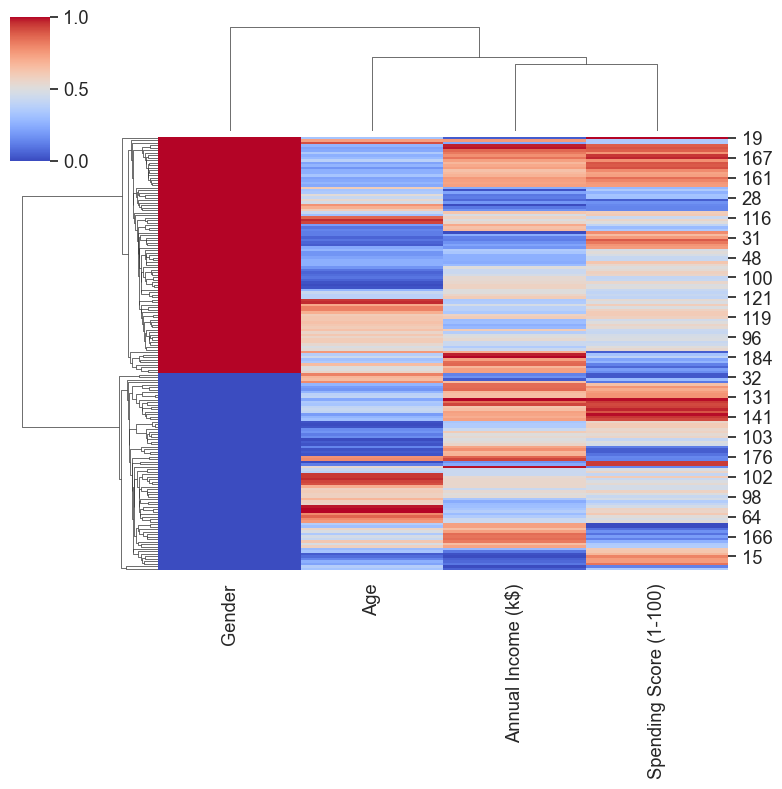

In [54]:
# Creacion de mapa de calor con dendograma asiendo uso de la libreria Seaborn.
sns.set(font_scale=1.2)
mapaCalor = sns.clustermap(Resultado, method='single', metric='euclidean', cmap="coolwarm", standard_scale=1, figsize=(8, 8))    

# Generar grafico visualmente.
plt.show()

Haciendo uso de este mapa de calor a mi conjunto de datos "Resultado" compuesto por las variables, Genero - edad - ingreso - puntuacion <br>
podemos identificar lo siguiente:<br><br>
La variable Gender (genero) no cuenta con una relacion directa con las demas variables del conjunto de datos, por lo cual esta no nos <br>
permitiria establecer directamente una mejora con el objetivo de optimizacion de servicios del centro comercial.<br><br>
La variable Age (Edad) nos permite realizar un analisis inverso, digo inverso en el sentido de que podemos evidenciar que las personas<br>
que cuentan con un numero mayor de años, se evidencia un mejor numero de ingresos anuales, ademas de evidenciarse que la calificacion<br>
presentada por la naturaleza de la persona en el centro comercial tambien es menos, esto nos puede permitir evaluar que esta generando<br>
en el centro comercial que las personas mayores disminuyan su puntaje y como lo podriamos optimizar para que se adapte mas a los resultados<br>
de los jovenes.<br><br>
Las variables Annual Income y Spending score: Estas dos variables al contrario de las demas en el mapa de calor si podemos evidenciar una<br>
alta relacion entre sus valores mas altos, esto significa que las personas tienden a obtener un mejor puntaje de calificacion en el centro<br>
comercial cuando tienen un valor de ingresos anuales mas alto, podemos deducir de este analisis que el principal publico objetivo en cuanto<br>
a optimizacion de servicios en el centro comercial debem ser las personas con mayores ingresos anuales.


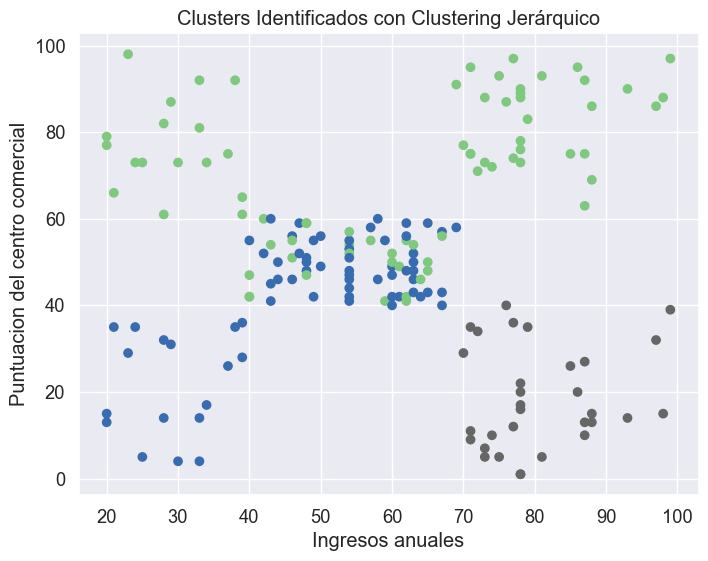

In [91]:

modelo = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Resultado['Cluster'] = model.fit_predict(scaled_data)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Resultado['Annual Income (k$)'], Resultado['Spending Score (1-100)'], c=Resultado['Cluster'], cmap='Accent')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Ingresos anuales')
plt.ylabel('Puntuacion del centro comercial')
plt.show()

# 7. Interpretar, analizar y documentar los resultados obtenidos.

Del metodo de aplicado de analisis de agrupamiento no supervisado denominado "hierarchical clustering", podemos interpretar<br>
que la aplicacion de este metodo en el dataset con los datos de un centro comercial ah sido aceptable, principalmente <br>
se han podido identificar relaciones existentes dentro de los clientes con ingresos anuales entre 40k y 70k con unos comportamientos<br>
mas estables y conformes dentro del centro comercial y estanfocalizados en una calificacion entre 40 y 60 puntos. tambien identicamos <br>
que la variable de genero no cuenta con una relacion directa frente a las otras variables por lo que podemos interpretar que no es un<br>
importante para la realizacion de la segmentacion dentro de los servicios del centro comercial.<br><br>

Principalmente podemos evidenciar que los clientes mayores en edad tambien cuentan con unos ingresos anuales bastante mas inferiores<br>
a los ingresos de las personas mas jovenes, por lo cual la edad tiene un papel bastante relevante frente al publico objetivo del <br>
centro comercial por que obtenemos que las personas mas mayores al tener menor nivel de ingreso se encuentran menos implicados <br>
naturalmente con el centro comercial, por lo cual deberian implementarse mas metodologias dentro del centro comercial buscando <br>
aumentar la participacion de las personas mayores.
